In [12]:
%matplotlib inline

from modsim import*



In [8]:
given_years=[1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
given_population=[293,473,682,216,208,336,106,351,283,417,82,222,250,173,190,72,151,108,45,25,42,150]

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


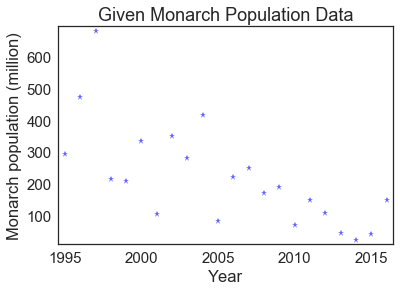

In [32]:
newfig()
plot(given_years, given_population, 'b*')
decorate(xlabel='Year',
         ylabel='Monarch population (million)',
         title='Given Monarch Population Data')

In [67]:
def plot_estimates(table):
    
    plot(given_years, ':', color='darkblue', label='US Census')
    plot(given_population, '--', color='green', label='UN DESA')
    
    decorate(xlabel='Year',
             ylabel='Monarch population (million)')
    
plot_estimates

<function __main__.plot_estimates>

In [69]:
system = System(t0 = 1995,
                t_end = 2016,
                mon_p0 = 400,
                birth_rate = .65,
                death_rate = .85)

In [70]:
system

,value
t0,1995.00
t_end,2016.00
mon_p0,400.00
birth_rate,0.65
death_rate,0.85


In [71]:
def run_simulation(system):
    Mature = TimeSeries()
    Mature[system.t0] = system.mon_p0
    
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * Mature[t]
        deaths = system.death_rate * Mature[t]
        
        Mature[t+1] = Mature[t] + births - deaths
        
    system.Mature = Mature

In [72]:

run_simulation(system)
system.Mature

,value
1995,400.000000
1996,320.000000
1997,256.000000
1998,204.800000
1999,163.840000
2000,131.072000
2001,104.857600
2002,83.886080
2003,67.108864
2004,53.687091


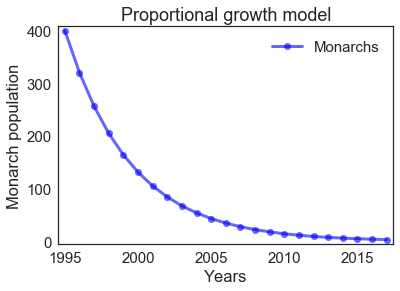

In [73]:
def plot_results(system, title=None):
    newfig()
    plot(system.Mature, 'bo-', label='Monarchs')
    decorate(xlabel='Years', 
             ylabel='Monarch population',
             title=title)
plot_results(system, title='Proportional growth model')

In [75]:
given_population2=[208,336,106,351,283,417,82,222,250,173,190,72,151,108]
given_egg_production=[130,80,128,49,51,20,39,42,40,19,13,29,20,9]
given_years2=[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012]

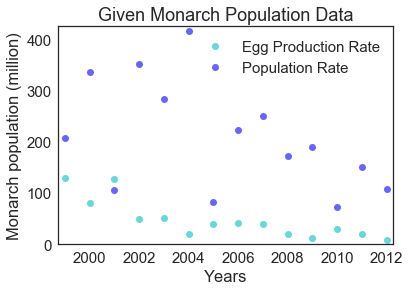

In [77]:
newfig()
plot(given_years2, given_egg_production, 'co', label='Egg Production Rate')
plot(given_years2, given_population2, 'bo', label='Population Rate')
decorate(xlabel='Years',
         ylabel='Monarch population (million)',
        title='Given Monarch Population Data')

In [144]:
system = System(t0 = 1999,
                t_end = 2012,
                mon_p0 = 208,
                egg_p0 = 130,
                birth_rate = .65,
                death_rate = .85,
                mature_rate= .95)



In [154]:
def run_simulation(system):
    Mature = TimeSeries()
    Mature[system.t0] = system.mon_p0
    
    eggs = TimeSeries()
    eggs[system.t0] = system.egg_p0
    
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * Mature[t]
        deaths = system.death_rate * Mature[t]
        mature = system.mature_rate * eggs[t]
        
        Mature[t+1] = Mature[t] + mature - deaths 
        eggs[t+1] = eggs[t] + births - deaths
        
    system.Mature = Mature
    system.eggs = eggs

In [155]:
run_simulation(system)
system.Mature
system.eggs


,value
1999,130.000000
2000,88.400000
2001,57.460000
2002,36.023000
2003,21.890050
2004,12.925738
2005,7.421981
2006,4.140528
2007,2.238133
2008,1.166074


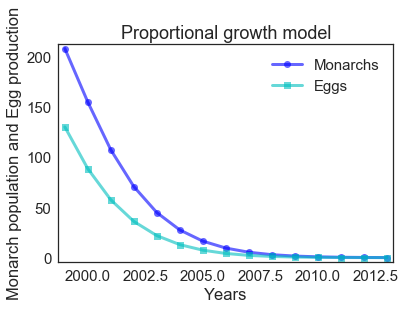

In [156]:
def plot_results(system, title=None):
    newfig()
    plot(system.Mature, 'bo-', label='Monarchs')
    plot(system.eggs, 'cs-', label='Eggs')
    decorate(xlabel='Years', 
             ylabel='Monarch population and Egg production',
             title=title)
    
plot_results(system, title='Proportional growth model')